## Simulating the waiting times in an $M/G/1$ queue using Lindley's recursion: $$Y_{i}=\max\{0,Y_{i-1}+X_{i-1}-A_{i}\},i=1,2,\dots$$

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def t_mean_confidence_interval(data,alpha):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = stats.t.ppf(1-alpha/2, n-1)*se
    return m, m-h[0], m+h[0]

In [6]:
AllWait = []
print ("Rep", "Average Wait")

m = 55000
d = 5000
MeanTBA = 1.0 # average interarrival time
MeanST = 0.8 # average service time

np.random.seed(1)

for Rep in range(0,10,1):
    Y = 0
    SumY = 0
    for i in range(0,d,1):
        A = np.random.exponential(MeanTBA, 1)
        X = np.sum(np.random.exponential(MeanST/3,3))
        Y = max(0, Y + X - A)
        
    for i in range(d,m,1):
        A = np.random.exponential(MeanTBA, 1)
        X = np.sum(np.random.exponential(MeanST/3,3))
        Y = max(0, Y + X - A)
        SumY = SumY + Y
    AllWait.append(SumY/(float(m-d)))
    print (Rep+1, SumY/(float(m-d)))


print ("CI for the steady-state ave. wait:", t_mean_confidence_interval(AllWait,0.05))

Rep Average Wait
1 [ 2.12473211]
2 [ 2.14931867]
3 [ 2.2030591]
4 [ 2.21395469]
5 [ 2.04307169]
6 [ 2.14750246]
7 [ 2.15739374]
8 [ 2.12068571]
9 [ 2.05444714]
10 [ 2.02822333]
CI for the steady-state ave. wait: (2.1242388611847032, 2.078234346673975, 2.1702433756954314)


### Next, we estimate the average waiting time of the ith customer (for $i$ = 0 to 500) and plot it to observe the convergence to the steady-state distribution. 

In [8]:
m = 500 # number of customers
n = 800 # number of replications
MeanTBA = 1.0 # average interarrival time
MeanST = 0.8 # average service time

# define a list of lists to keep the wait times across replciations
wait_times_reps = []

np.random.seed(1)

for reps in range(0,n):
    # for each rep, simulate the waiting time of the first N customres
    wait_times = []
    wait_times.append(0) # first customer's wait is 0
    Y = 0

    for i in range (1,m):
        A = np.random.exponential(MeanTBA, 1)
        X = np.sum(np.random.exponential(MeanST/3,3))
        Y = max(0,Y + X - A)
        wait_times.append(Y)
    
    # append the list of wait_times to the wait_times_reps     
    wait_times_reps.append(wait_times)

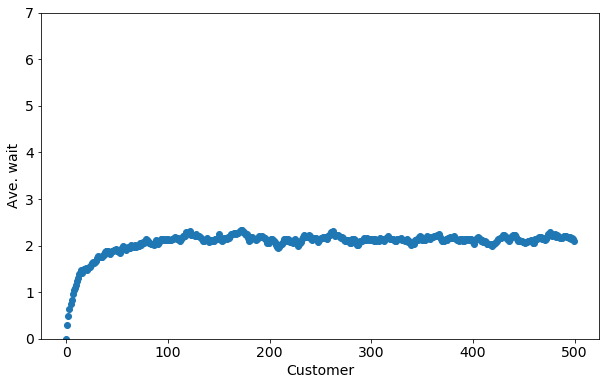

In [10]:
# compute the sample average for the ith customer across replications
# and save it in Ave_waits list
wait_times_reps_array = np.array(wait_times_reps)
# axis = 0 computes column averages
Ave_waits_y = np.mean(wait_times_reps_array,axis = 0)

plt.plot(Ave_waits_y,'o')
axes = plt.gca()
axes.set_ylim([0,7])
plt.xlabel('Customer')
plt.ylabel('Ave. wait')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams.update({'font.size': 14})
plt.show()